In [156]:
import pandas as pd
import numpy as np

In [157]:
train = pd.read_csv('A:\\Data Analysis Jupyter\\House Prices\\train.csv')
test = pd.read_csv('A:\\Data Analysis Jupyter\\House Prices\\test.csv')

In [158]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [159]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [161]:
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [162]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is : 1.8828757597682129


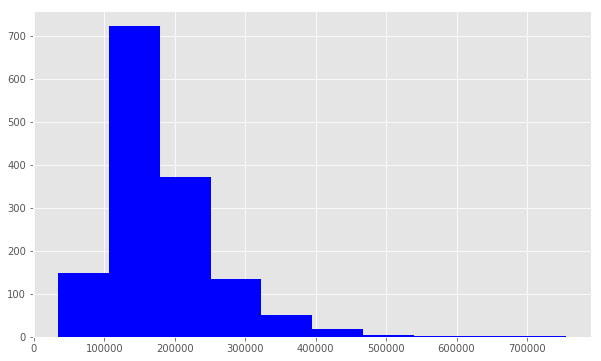

In [163]:
print("Skew is :", train.SalePrice.skew())
plt.hist(train.SalePrice, color = 'Blue')
plt.show()

We can see, that the hist is positively skewed, longer tail on the right.
If the the target variable i.e SalePrice is skewed, log-transform the variable to improve the linearity of data.
https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers

Skew is: 0.12133506220520406


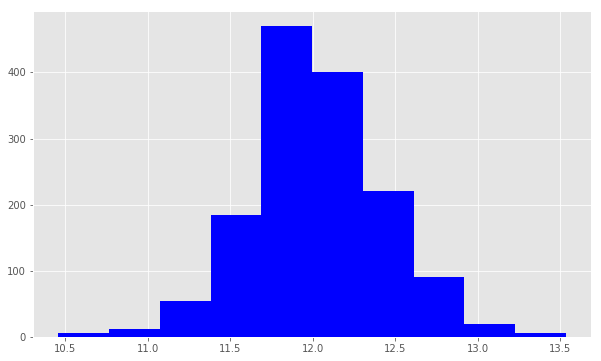

In [164]:
target = np.log(train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

# Numeric Features 

In [179]:
# .select_dtypes() method will return a subset of columns matching the specified data types.
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Determine the co-relation between numeric_features and the target variable

In [166]:
# .corr() method displays the correlation (or relationship) between the columns.
# corr is calculated for all the columns in numeric_features dataframe
corr = numeric_features.corr()

# printing values related to our target variable
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five are most positively co-related with Sale price 
and the last five are negatively co-related.

In [180]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

# Creating Pivot Table - 
https://www.dataquest.io/blog/pandas-pivot-table/

In [181]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,87500
4,108000
5,133000
6,160000
7,200141
8,270000
9,345000


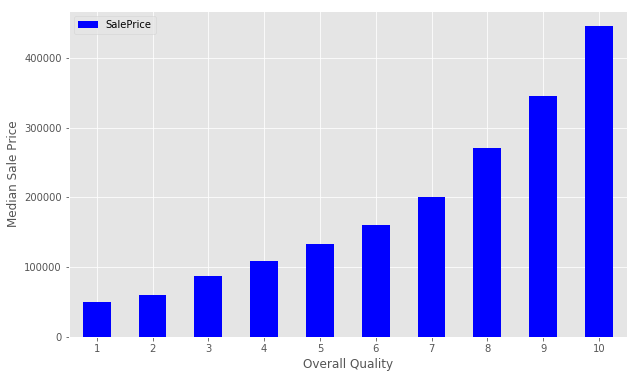

In [182]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# CONCLUSION - median sales price strictly increases as Overall Quality increases.

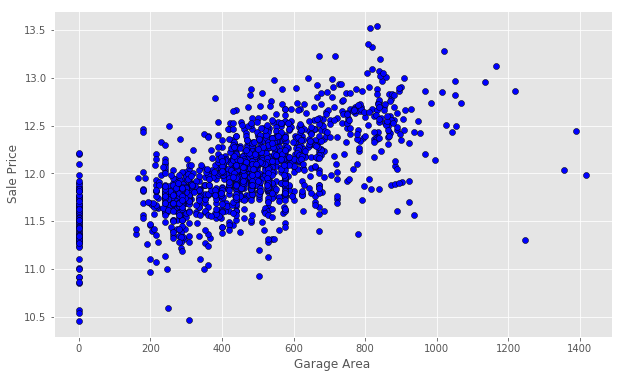

In [175]:
plt.scatter(x=train['GarageArea'], y=target, color = 'blue', edgecolors = 'black')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()
#Notice that there are many homes with 0 for Garage Area, indicating that they don't have a garage.
#There are a few outliers as well.
#Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. 
#So, we'll remove those observations from our data. Removing outliers is an art and a science.


Many homes have 0 garage area.
Few outliers are present having garage area >1200, outliers affect the regression model by pulling our regression line
away from the true population regression line.
So remove such observations.

In [184]:
# Create a new dataframe with those outliers removed
train = train[train['GarageArea'] < 1200]

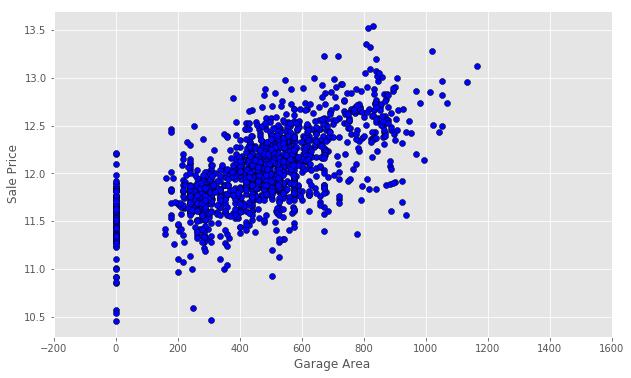

In [185]:
#new scatter-plot
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice), color='blue', edgecolors = 'black')
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Counting null values

In [192]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Column Name'
nulls

,Null Count
Column Name,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [194]:
print("Unique Values are:", train.MiscFeature.unique())

Unique Values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


 Categorical variables - Qualitative(names, labels)
 Numerical Variables - Quantitative(number)

In [201]:
categoricals = train.select_dtypes(exclude = [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


Count no of values having street type = pave or gravel

In [206]:
print("Originals: \n")
print(train.Street.value_counts(), "\n")

Originals: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



The model should have numerical data, so we use *one hot encoding* to transform the data.
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

By default, get_dummies() does not do dummy encoding, but one-hot encoding.
To produce an actual dummy encoding from your data, use drop_first=True.
Some machine learning techniques require you 
to drop one dimension from the representation so as 
to avoid dependency among the variables. 
Use "drop_first=True" to achieve that.

In [208]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first = True)

In [209]:
print('Encoded: \n')
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


1 - Pave, 0 - Gravel

How does the sale conditon affect the sale prices?

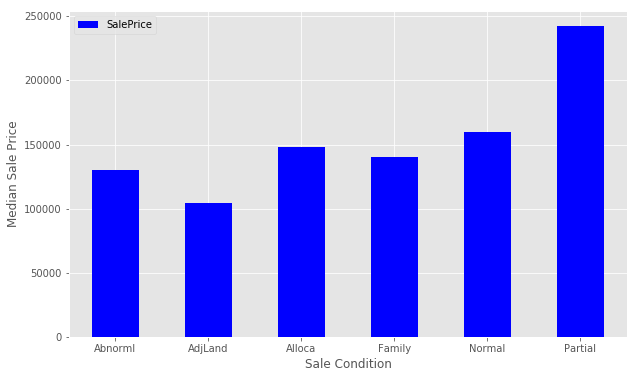

In [210]:
condition_pivot = train.pivot_table(index = 'SaleCondition',
                                   values = 'SalePrice', aggfunc = np.median)
condition_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

Partial has the median sale price than other.
Select all the houses where SaleCondition is equal to partial and assign the value 1, otherwise assign 0.

In [212]:
# create function x having follwing conditons, and pass it in the values
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['end_condition'] =  test.SaleCondition.apply(encode)

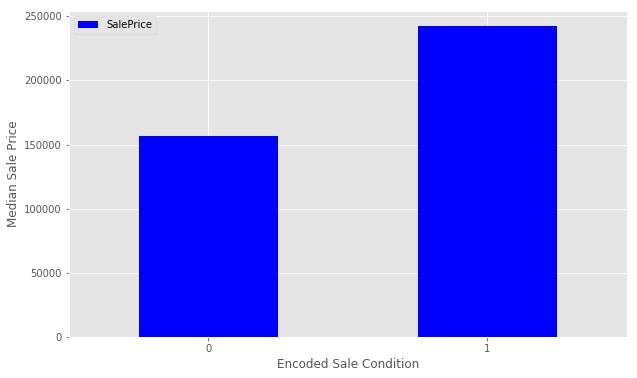

In [215]:
condition_pivot = train.pivot_table(index = 'enc_condition', values = 'SalePrice',
                                   aggfunc = np.median)
condition_pivot.plot(kind = 'bar', color = 'blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation = 0)
plt.show()

## Handling missing data

In [217]:
data = train.select_dtypes(include = [np.number]).interpolate().dropna()

# DATA MODELLING
Building a linear model.
Separate the features and the target variable for modeling.
Assign features to X and target variable(saleprice) to y.
Use np.log() to transform y variable.

In [218]:
# log-transform y variable for linearity
y = np.log(train.SalePrice)
# drop[features], axis=1 tells which colums to exlude.
X = data.drop(['SalePrice', 'Id'], axis = 1)


In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,
                                                   test_size = 0.33)

In [220]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [221]:
model = lr.fit(X_train, y_train)

In [222]:
print( "R^2 is: \n", model.score(X_test, y_test))
# A higher R-squared value means a better fit

R^2 is: 
 0.8882477709262553


In [224]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01784179451956757


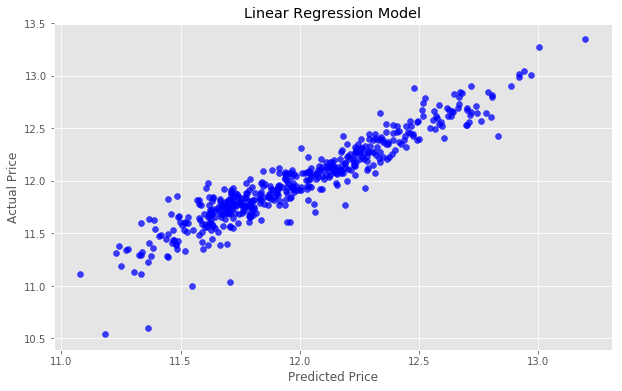

In [225]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha = 0.75,
           color = 'blue') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If predicted values are identical to actual values, thus graph would be straight line y=x because each predicted value x would be equal to each actual value y.

In [228]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [229]:
feats = test.select_dtypes(
include = [np.number]).drop(['Id'], axis = 1).interpolate()

In [231]:
predictions = model.predict(feats)
# return column of exponential values
final_predictions = np.exp(predictions)

In [236]:
print("Original predicitons are: \n", predictions[:5], "\n" )
print("Final Predictions are: \n", final_predictions[:10], "\n")

Original predicitons are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final Predictions are: 
 [128959.49172586 122920.7402436  175704.82598102 200050.83263756
 182075.46986405] 



In [241]:
submission['SalePrice'] = final_predictions
submission.head(5)

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864
